In [64]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import math
import time
from matplotlib.dates import MonthLocator, WeekdayLocator, WEEKLY, DateFormatter,rrulewrapper, RRuleLocator
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
import matplotlib as mpl


pd.options.display.max_columns = 100

In [65]:
#df = pd.read_csv('crime_thru_midsept.csv')
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df.tail()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
489626,20180000320209,08/28/2018,8.0,08/28/2018,124.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,SOUTH,R,R1,MID BEACON HILL
489627,20180000320316,08/28/2018,0.0,08/28/2018,322.0,CAR PROWL,THEFT-LICENSE PLATE,SOUTHWEST,F,F2,ROXHILL/WESTWOOD/ARBOR HEIGHTS
489628,20180000320203,08/28/2018,0.0,08/28/2018,57.0,AGGRAVATED ASSAULT,ASSLT-AGG-BODYFORCE,NORTH,L,L3,LAKECITY
489629,20070000430946,NaN,NaN,01/01/2007,NaN,RAPE,RAPE-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
489630,19990000333737,NaN,NaN,01/01/1999,NaN,THEFT-SHOPLIFT,THEFT-SHOPLIFT,UNKNOWN,NaN,NaN,UNKNOWN


In [66]:
#df = pd.read_csv('crime_thru_midsept.csv')
df = pd.read_csv('Crime_Data.csv')
#df = pd.read_csv('Aug_Sept.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2007-12-31') & (df['date'] < '2018-08-28')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfx = dfg.resample('W').sum()
dfw=dfx[1:-1]
#dfw=dfw[:-1]
#series = dfx['Crime Subcategory']
dfw.rename(columns={'Crime Subcategory': 'number_crimes'}, inplace=True)
dfw

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,number_crimes
date,
2008-01-13,787
2008-01-20,743
2008-01-27,718
2008-02-03,657
2008-02-10,689
2008-02-17,755
2008-02-24,783
2008-03-02,786
2008-03-09,742


In [67]:
# Baseline:  Average Crimes/Week
train, test = series.values[0:-150], series.values[-150:]
pred_test_avg=test*0+train.mean()
pred_train_avg=train*0+train.mean()
rmse_test = sqrt(mean_squared_error(pred_test_avg, test))
rmse_train = sqrt(mean_squared_error(pred_train_avg, train))
print(rmse_test)
print(rmse_train)

122.79771625155772
84.6482478912366


In [68]:
pred_test_avg

array([849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14074074,
       849.14074074, 849.14074074, 849.14074074, 849.14

In [76]:
# Baseline:  Naive Model.  Today's Crime = Yesterday's Crime
X = series.values
train, test = X[0:-150], X[-150:]
# walk-forward validation
history = [x for x in train]
predictions_naive = list()
for i in range(len(test)):
	# make prediction
	predictions_naive.append(history[-1])
	# observation
	history.append(test[i])
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions_naive))

print('RMSE: %.3f' % rmse)

predictions_naive


RMSE: 68.003


[885,
 933,
 1000,
 1055,
 987,
 862,
 987,
 975,
 1015,
 976,
 1021,
 867,
 903,
 939,
 939,
 1074,
 1029,
 998,
 959,
 995,
 978,
 912,
 796,
 887,
 917,
 894,
 870,
 915,
 959,
 909,
 938,
 932,
 1017,
 1009,
 933,
 873,
 968,
 889,
 989,
 1049,
 900,
 907,
 896,
 879,
 883,
 895,
 948,
 939,
 849,
 925,
 932,
 917,
 904,
 949,
 985,
 950,
 947,
 1002,
 1030,
 997,
 992,
 941,
 981,
 926,
 898,
 936,
 922,
 958,
 999,
 861,
 844,
 898,
 915,
 949,
 884,
 978,
 1066,
 1053,
 916,
 926,
 902,
 975,
 943,
 876,
 1001,
 1031,
 917,
 909,
 912,
 963,
 1127,
 985,
 968,
 999,
 1038,
 1082,
 984,
 1017,
 1021,
 1082,
 907,
 1001,
 997,
 944,
 973,
 1008,
 1012,
 1009,
 885,
 875,
 980,
 966,
 1035,
 897,
 974,
 977,
 858,
 1003,
 952,
 920,
 907,
 1000,
 945,
 1020,
 918,
 943,
 869,
 948,
 940,
 1005,
 961,
 941,
 895,
 1012,
 1018,
 991,
 998,
 1073,
 926,
 1009,
 1024,
 1017,
 1007,
 969,
 940,
 1063,
 988,
 1034,
 929,
 886]

In [77]:
history = [x for x in train]
predictions_naive_train = list()
for i in range(len(train)):
	# make prediction
	predictions_naive_train.append(history[-1])
	# observation
	history.append(train[i])
    
rmse = sqrt(mean_squared_error(train, predictions_naive_train))    
print('RMSE: %.3f' % rmse)


RMSE: 65.477


In [414]:
len(predictions_naive_train)

406

## LSTM

In [71]:
# frame a sequence as a stacked supervised learning problem:  1 lag, not 3, 150 epochs
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1], 1)
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), 
                   stateful=True, return_sequences=True))
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1,1,len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

#load the dataset
dataset = series.values
dataset = dataset.astype('float32')

# transform data to be supervised learning
supervised = timeseries_to_supervised(dataset,1)
supervised_values = supervised.values

# split into train and test sets
train, test = supervised_values[0:-150], supervised_values[-150:]

# normalize the dataset
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 150, 1)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

#walk-forward validation on the test data
predictions_test_lstm = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions_test_lstm.append(yhat)
	expected = series.values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

predictions_train_lstm = list()
for i in range(len(train_scaled)):
	# make one-step forecast
	X_train, y_train = train_scaled[i, 0:-1], train_scaled[i, -1]
	yhat_train = forecast_lstm(lstm_model, 1, X_train)
	# invert scaling
	yhat_train = invert_scale(scaler, X, yhat_train)
	# store forecast
	predictions_train_lstm.append(yhat_train)
	expected = series.values[i]

# report performance
trainScore = sqrt(mean_squared_error(series.values[:-150], predictions_train_lstm))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(series.values[-150:], predictions_test_lstm))
print('Test Score: %.3f RMSE' % (testScore))




Epoch 1/1
405/405 [==============================] - 3s 7ms/step - loss: 0.0913
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0901
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0878
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0867
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0873
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0870
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0846
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0834
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0823
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0812
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0799
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0784
Epoch 1/1
405/405 [=====================

405/405 [==============================] - 2s 4ms/step - loss: 0.0465
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0465
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0465
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0465
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0465
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0464
Epoch 1/1
405/405 [==============================] - 1s 4ms/step - loss: 0.0464
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0464
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0464
Epoch 1/1
405/405 [==============================] - 2s 5ms/step - loss: 0.0464
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0464
Epoch 1/1
405/405 [==============================] - 2s 4ms/step - loss: 0.0464
Epoch 1/1
405/405 [==============================]

Day=133, Predicted=919.432922, Expected=1012.000000
Day=134, Predicted=958.236389, Expected=1018.000000
Day=135, Predicted=973.014038, Expected=991.000000
Day=136, Predicted=972.671570, Expected=998.000000
Day=137, Predicted=974.941956, Expected=1073.000000
Day=138, Predicted=988.172302, Expected=926.000000
Day=139, Predicted=964.676147, Expected=1009.000000
Day=140, Predicted=975.701294, Expected=1024.000000
Day=141, Predicted=982.919800, Expected=1017.000000
Day=142, Predicted=984.724792, Expected=1007.000000
Day=143, Predicted=983.720459, Expected=969.000000
Day=144, Predicted=973.870667, Expected=940.000000
Day=145, Predicted=958.529907, Expected=1063.000000
Day=146, Predicted=983.369629, Expected=988.000000
Day=147, Predicted=977.824280, Expected=1034.000000
Day=148, Predicted=985.972534, Expected=929.000000
Day=149, Predicted=961.960449, Expected=886.000000
Day=150, Predicted=925.417236, Expected=887.000000
Train Score: 58.566 RMSE
Test Score: 57.415 RMSE


In [320]:
for i in range(len(dataset)):
	# make one-step forecast
	X, y = dataset[i, 0:-1], dataset[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	#yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions_test_lstm.append(yhat)
	expected = series.values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


#Sept 2

IndexError: too many indices for array

In [321]:
#k = (dfw[-5:]).values
#s = (k).reshape(1,1,len(k))
#yhat = lstm_model.predict(s)
#Sept 9
#912
#series = dfw['Crime Subcategory']
#s = 912
#k
dataset

array([ 787.,  743.,  718.,  657.,  689.,  755.,  783.,  786.,  742.,
        735.,  738.,  813.,  753.,  730.,  769.,  836.,  756.,  838.,
        789.,  846.,  838.,  805.,  903.,  843.,  824.,  810.,  762.,
        893.,  910.,  821.,  827.,  801.,  797.,  861.,  847.,  877.,
        950.,  926.,  900.,  856.,  874.,  974.,  960.,  886.,  849.,
        893.,  834.,  861.,  823.,  659.,  610.,  854.,  897.,  881.,
        853.,  916.,  838.,  752.,  767.,  717.,  763.,  823.,  766.,
        819.,  752.,  885.,  797.,  777.,  769.,  737.,  850.,  869.,
        858.,  784.,  842.,  885.,  881.,  798.,  819.,  871.,  931.,
        877.,  898.,  883.,  967.,  925.,  891.,  989.,  999.,  959.,
        940.,  893.,  933.,  977.,  883.,  809.,  899.,  984.,  872.,
        832.,  841., 1005.,  875.,  923.,  982.,  967.,  997.,  987.,
        877.,  836.,  782.,  800.,  752.,  782.,  848.,  837.,  791.,
        746.,  842.,  888.,  839.,  819.,  863.,  854.,  938.,  866.,
        804.,  873.,

In [383]:
# frame a sequence as a stacked supervised learning problem:  1 lag, not 3, 150 epochs
# REAL PREDICTIONS
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# scale train and test data to [-1, 1]
def scale( test):
	# fit scaler
	#scaler = MinMaxScaler(feature_range=(-1, 1))
	#scaler = scaler.fit(train)
	# transform train
	#train = train.reshape(train.shape[0], train.shape[1])
	#train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler,  test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
#def fit_lstm(train, batch_size, nb_epoch, neurons):
#     X, y = train[:, 0:1], train[:, -1]
#     X = X.reshape(X.shape[0], X.shape[1], 1)
#     model = Sequential()
#     model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), 
#                    stateful=True, return_sequences=True))
#     model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     for i in range(nb_epoch):
#         model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
#         model.reset_states()
#     return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1,1,len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

#load the dataset
dataset = dfw.values
dataset = dataset.astype('float32')

# transform data to be supervised learning
supervised = timeseries_to_supervised(dataset,1)
supervised_values = supervised.values

# split into train and test sets
test = supervised_values

# normalize the dataset
scaler,test_scaled = scale(test)
# fit the model
#lstm_model = fit_lstm(train_scaled, 1, 150, 1)

# # forecast the entire training dataset to build up state for forecasting
# train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
# lstm_model.predict(train_reshaped, batch_size=1)

#walk-forward validation on the test data
predictions_test_lstm = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions_test_lstm.append(yhat)
    #expected = series.values[len(test) + i]
    expected = series.values[i]
    print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
testScore = sqrt(mean_squared_error(series.values, predictions_test_lstm))
print('Test Score: %.3f RMSE' % (testScore))


Day=1, Predicted=787.199524, Expected=787.000000
Day=2, Predicted=776.394531, Expected=743.000000
Day=3, Predicted=774.195007, Expected=718.000000
Day=4, Predicted=771.372620, Expected=657.000000
Day=5, Predicted=763.571777, Expected=689.000000
Day=6, Predicted=762.083984, Expected=755.000000
Day=7, Predicted=766.964478, Expected=783.000000
Day=8, Predicted=774.882324, Expected=786.000000
Day=9, Predicted=783.447510, Expected=742.000000
Day=10, Predicted=782.425049, Expected=735.000000
Day=11, Predicted=779.785034, Expected=738.000000
Day=12, Predicted=778.214905, Expected=813.000000
Day=13, Predicted=790.609802, Expected=753.000000
Day=14, Predicted=789.042053, Expected=730.000000
Day=15, Predicted=782.955627, Expected=769.000000
Day=16, Predicted=785.516296, Expected=836.000000
Day=17, Predicted=803.062500, Expected=756.000000
Day=18, Predicted=797.932861, Expected=838.000000
Day=19, Predicted=814.349487, Expected=789.000000
Day=20, Predicted=812.893921, Expected=846.000000
Day=21, P

Day=221, Predicted=791.502319, Expected=791.000000
Day=222, Predicted=796.663574, Expected=743.000000
Day=223, Predicted=790.001343, Expected=819.000000
Day=224, Predicted=802.129028, Expected=801.000000
Day=225, Predicted=807.985596, Expected=896.000000
Day=226, Predicted=843.296448, Expected=780.000000
Day=227, Predicted=828.147705, Expected=746.000000
Day=228, Predicted=806.405334, Expected=858.000000
Day=229, Predicted=825.501282, Expected=843.000000
Day=230, Predicted=837.492554, Expected=815.000000
Day=231, Predicted=834.515930, Expected=712.000000
Day=232, Predicted=801.341980, Expected=767.000000
Day=233, Predicted=795.961426, Expected=845.000000
Day=234, Predicted=813.570679, Expected=855.000000
Day=235, Predicted=833.924866, Expected=749.000000
Day=236, Predicted=812.444397, Expected=805.000000
Day=237, Predicted=813.617432, Expected=823.000000
Day=238, Predicted=820.953064, Expected=808.000000
Day=239, Predicted=821.783875, Expected=768.000000
Day=240, Predicted=809.804260, 

Day=445, Predicted=970.650391, Expected=900.000000
Day=446, Predicted=946.918518, Expected=907.000000
Day=447, Predicted=925.921997, Expected=896.000000
Day=448, Predicted=911.398193, Expected=879.000000
Day=449, Predicted=897.135620, Expected=883.000000
Day=450, Predicted=891.443726, Expected=895.000000
Day=451, Predicted=894.415649, Expected=948.000000
Day=452, Predicted=919.151733, Expected=939.000000
Day=453, Predicted=930.788940, Expected=849.000000
Day=454, Predicted=897.476135, Expected=925.000000
Day=455, Predicted=907.743225, Expected=932.000000
Day=456, Predicted=920.306213, Expected=917.000000
Day=457, Predicted=921.020142, Expected=904.000000
Day=458, Predicted=914.543945, Expected=949.000000
Day=459, Predicted=929.125061, Expected=985.000000
Day=460, Predicted=952.236816, Expected=950.000000
Day=461, Predicted=953.397705, Expected=947.000000
Day=462, Predicted=949.716187, Expected=1002.000000
Day=463, Predicted=966.358215, Expected=1030.000000
Day=464, Predicted=977.585266

## Multi-method plot

<Figure size 432x288 with 0 Axes>

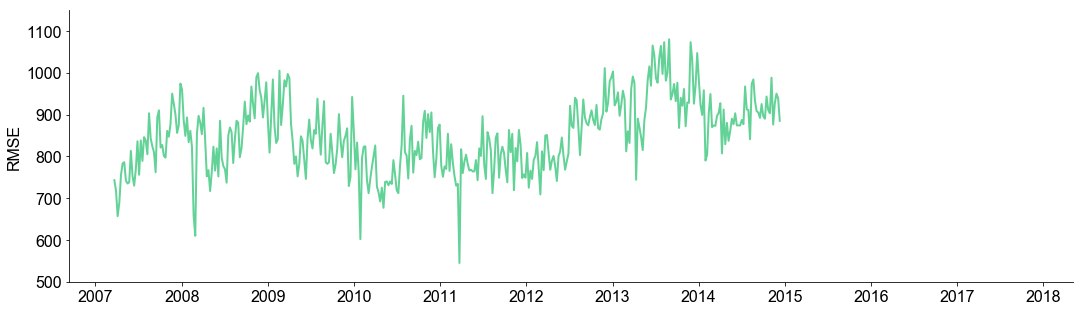

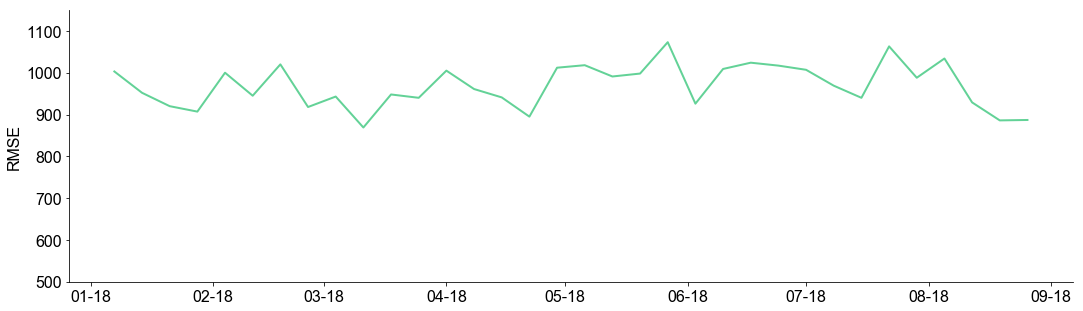

In [72]:
# AVERAGE
# test
# train
pred_test_avg
pred_train_avg

# NAIVE
# test
# train
predictions_naive
predictions_naive_train

# OLS
# test
# train


# LSTM
# test
# train
predictions_test_lstm
predictions_train_lstm

# LSTM with variables
# test
# train
# predictions_test_mv
# predictions_train_mv

# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax = plt.subplot(111)
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'white')
#ax.plot_date(dfw.index[-150:],predictions, '-')
#ax.plot_date(dfw.index[3:-150],train[3:], '-',)
ax.plot_date(dfw.index[1:-150],series.values[1:-150], '-', color = '#63d297', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)

plt.show()

# #2018 Only

months    = MonthLocator(range(1,13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%m-%y")


fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', linewidth = 2.0, color = '#63d297')
#ax.plot_date(dfw.index[-34:],predictions[-34:], '-', linewidth = 2.0)
#ax.plot_date(dfw.index[-34:],predictionsn[-34:], '-', color = 'grey', linewidth = 0.4)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.savefig('avg1b.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

In [101]:
#df = pd.read_csv('crime_thru_midsept.csv')
df = pd.read_csv('Crime_Data.csv')
#df = pd.read_csv('Aug_Sept.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2007-12-31') & (df['date'] < '2018-08-28')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
#dfg['date']=dfg.index
dfx = dfg.resample('W').sum()
dfx['date']=dfx.index
dfx.sort_values('Crime Subcategory')

,Crime Subcategory,date
date,,
2018-09-02,88,2018-09-02
2012-01-22,545,2012-01-22
2010-11-28,602,2010-11-28
2008-12-28,610,2008-12-28
2008-02-03,657,2008-02-03
2008-12-21,659,2008-12-21
2011-03-06,677,2011-03-06
2008-02-10,689,2008-02-10
2011-02-20,692,2011-02-20


<Figure size 432x288 with 0 Axes>

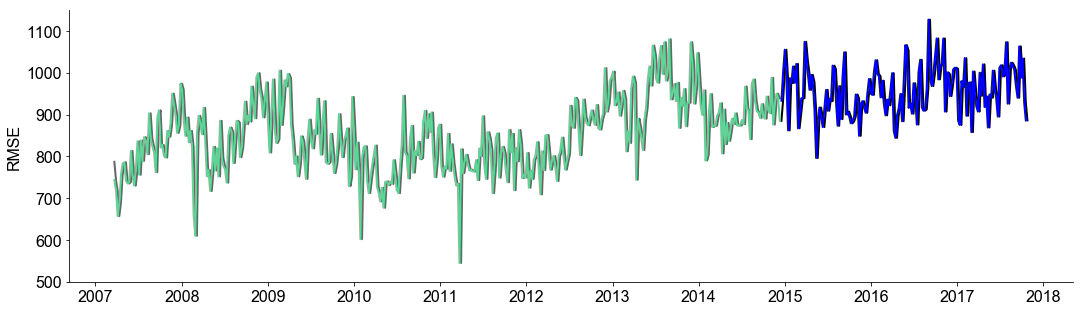

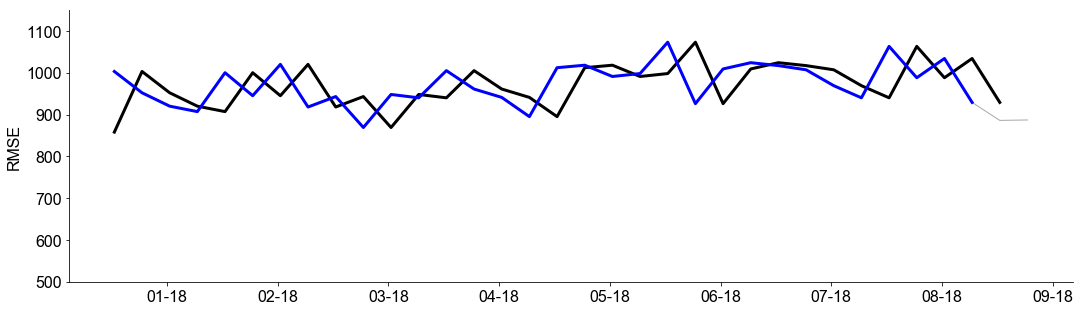

In [138]:

# line plot of observed vs predicted
plt.clf()

months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax = plt.subplot(111)
ax.plot_date(dfw.index[-150:],series.values[-150:], '-' , color = 'white', linewidth = 2.0)
ax.plot_date(dfw.index[-150:],predictions_naive, '-',color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150],predictions_naive_train[1:], '-',color = '#666666ff', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150],series.values[1:-150], '-',color= '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-150:-1],series.values[-150:-1], '-' , color = 'blue', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
#plt.show()

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', linewidth = 2.0, color = 'white')
ax.plot_date(dfw.index[-34:-1],predictions_naive[-34:-1], '-', color = 'black', linewidth = 3.0)
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', linewidth = 1.0, color = 'darkgrey')
ax.plot_date(dfw.index[-34:-2],series.values[-34:-2], '-' , color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:-3], predictions_test_lstm[-34:-3], '-', color = 'black', linewidth = 3.0)

ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(500, 1150)
plt.show();


<Figure size 432x288 with 0 Axes>

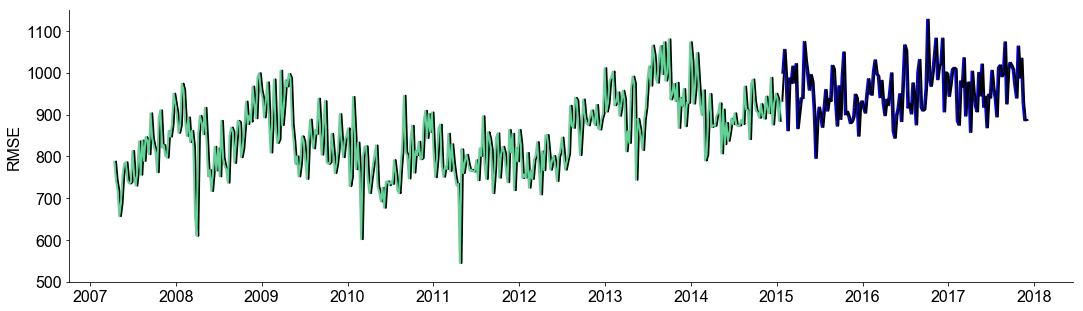

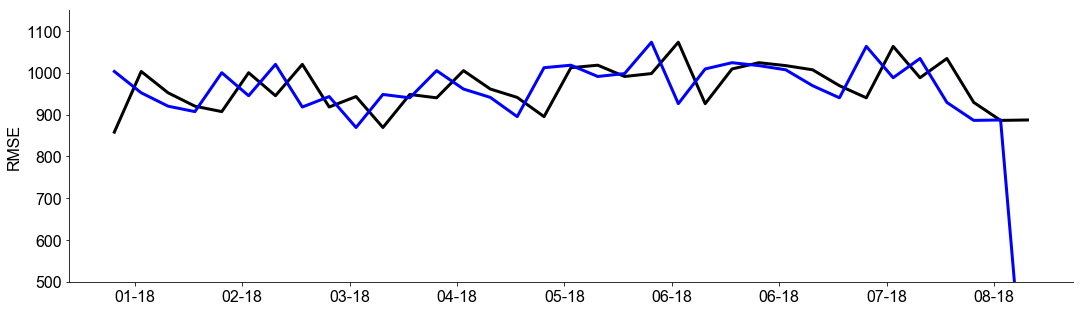

In [417]:
# line plot of observed vs predicted
plt.clf()
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:-1],series.values[-150:-1], '-' , color = 'blue', linewidth = 2.0)
#ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'black', linewidth =2.0)
#ax.plot_date(dfw.index[1:-150],pred_train_avg[1:], '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[-150:],predictions_naive, '-', color= 'black', linewidth =2.0)
ax.plot_date(dfw.index[1:-150],predictions_naive_train[1:], '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[:-150],series.values[:-150], '-',color= '#63d297', linewidth =2.0)

plt.ylim(500, 1150)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)


plt.show()

#2018 Only

months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
#ax.plot_date(dfw.index[-34:],series.values[-34:], '-', linewidth = 1.0)
ax.plot_date(dfw.index[-35:],predictions_naive[-35:], '-', linewidth = 3.0, color ='black')
#ax.plot_date(dfw.index[-34:],predictionsn[-34:], '-', color = 'grey', linewidth = 0.4)
ax.plot_date(dfw.index[-35:],series.values[-35:], '-', linewidth = 3.0, color = 'b')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.ylim(500, 1150)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.show()


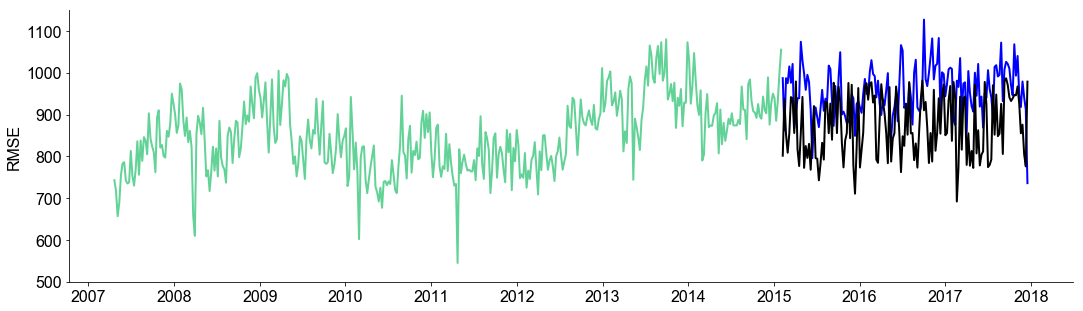

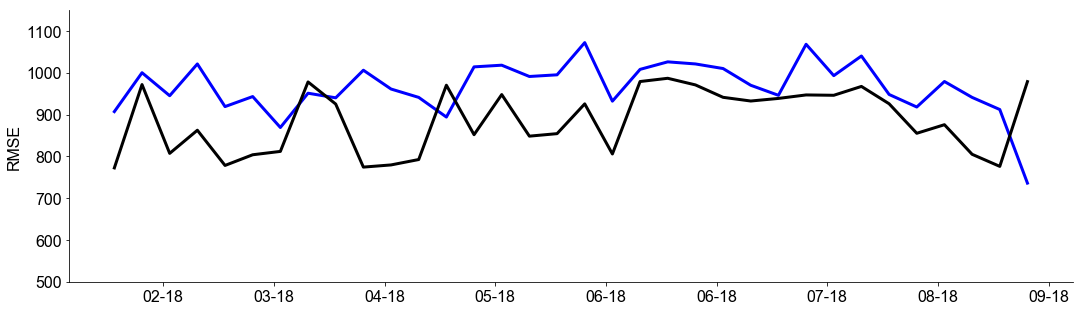

In [390]:

months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'blue', linewidth = 2.0)
#ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'lightgrey', linewidth =1.0)
#ax.plot_date(dfw.index[:-150],pred_train_avg, '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[1:-150],series.values[1:-150], '-', color = '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-150:], predictions_test_ols, '-', color = 'black', linewidth = 2.0)
#ax.plot_date(dfw.index[1:-150], predictions_naive_train[1:], '-', color = 'black', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.savefig('avg1g.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:],pred_test_avg[-34:], '-', color= 'black', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg[-34:], '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[:-150],series.values[:-34], '-', color = '#63d297', linewidth = 2.0)
#ax.plot_date(dfw.index[-34:], predictions_naive[-34:], '-', color = 'black', linewidth = 3.0)
ax.plot_date(dfw.index[-34:], predictions_test_ols[-34:], '-', color = 'black', linewidth = 3.0)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})

plt.ylim(500, 1150)
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('avg1h.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()


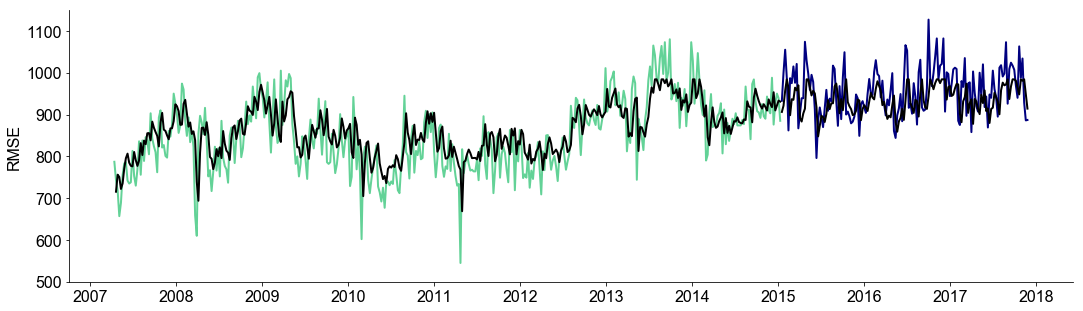

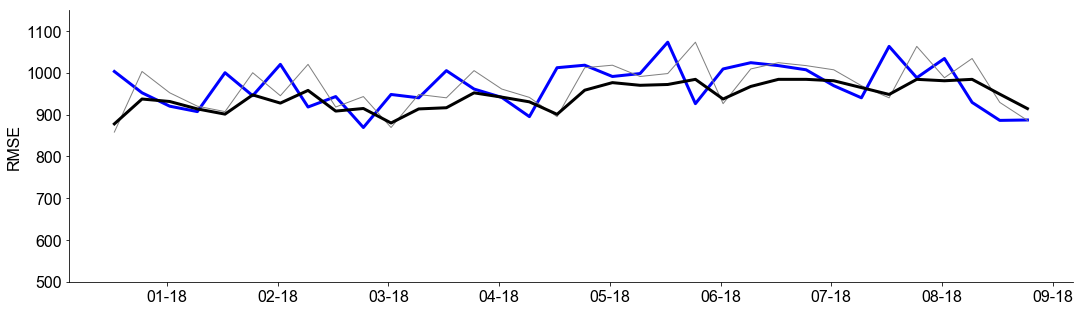

In [238]:

months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'navy', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'lightgrey', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg, '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[:-150],series.values[:-150], '-', color = '#63d297', linewidth = 2.0)
#ax.plot_date(dfw.index[-150:], predictions_naive, '-', color = 'lightgrey', linewidth = 1.0)
#ax.plot_date(dfw.index[1:-150], predictions_naive_train[1:], '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[-150:], predictions_test_XXXX, '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150], predictions_train_XXXX[1:], '-', color = 'black', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.savefig('avg1g.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:],series.values[-34:], '-', color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:],pred_test_avg[-34:], '-', color= 'grey', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg[-34:], '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[:-150],series.values[:-34], '-', color = '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-34:], predictions_naive[-34:], '-', color = 'grey', linewidth = 1.0)
ax.plot_date(dfw.index[-34:], predictions_test_XXX[-34:], '-', color = 'black', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:], predictions_naive_train[-34:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[:-34], predictions_test_XXX, '-', color = 'black', linewidth = 2.0)
#ax.plot_date(dfw.index[-34:], predictions_train_XXX[-34:], '-', color = 'gray', linewidth = 3.0)
# Only show ticks on the left and bottom spines

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})

plt.ylim(500, 1150)
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('avg1h.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()


In [86]:
len(predictions_naive)

0

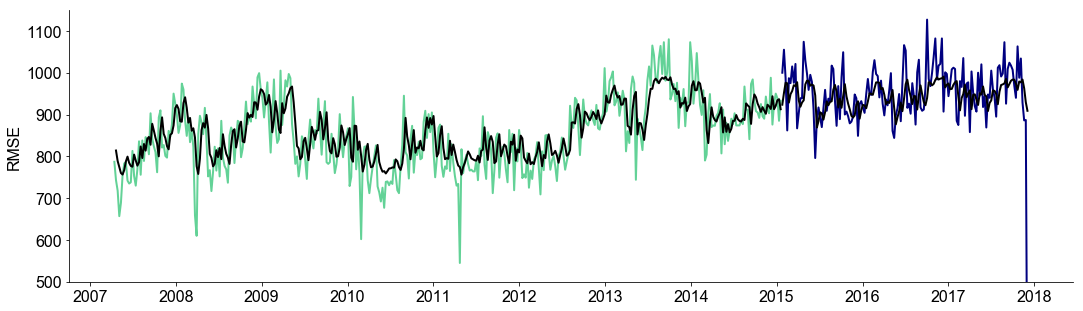

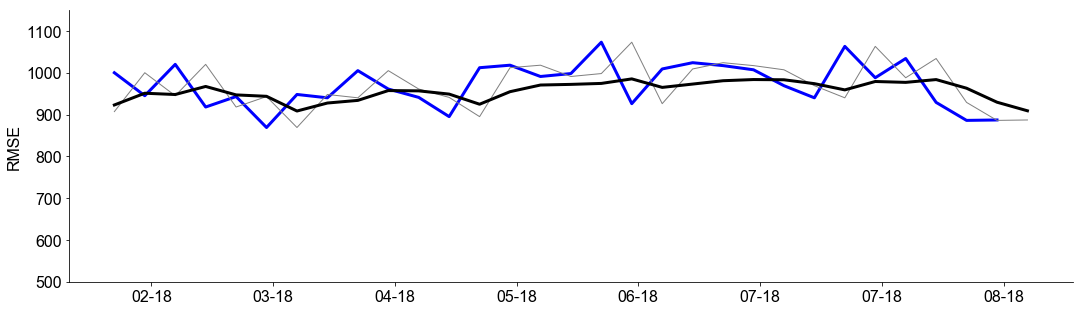

In [426]:
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'navy', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'lightgrey', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg, '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[:-150],series.values[:-150], '-', color = '#63d297', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:], predictions_naive, '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[1:-150], predictions_naive_train[1:], '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[-150:], predictions_test_XXX, '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[1:-150], predictions_train_XXX[1:], '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[-150:], predictions_test_lstm, '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150], predictions_train_lstm[1:], '-', color = 'black', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.savefig('avg1g.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-31:-1],series.values[-31:-1], '-', color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:],pred_test_avg[-34:], '-', color= 'grey', linewidth =1.0)
#ax.plot_date(dfw.index[:-150],pred_train_avg[-34:], '-', color = 'lightgrey', linewidth = 1.0)
#ax.plot_date(dfw.index[:-34],series.values[:-34], '-', color = '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-31:], predictions_naive[-31:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[-34:], predictions_naive_train[-34:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[-34:], predictions_test_XXX[-34:], '-', color = 'grey', linewidth = 1.0)
ax.plot_date(dfw.index[-31:], predictions_test_lstm[-31:], '-', color = 'black', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:], predictions_train_lstm[-34:], '-', color = 'black', linewidth = 3.0)
# Only show ticks on the left and bottom spines


ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})

plt.ylim(500, 1150)
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('avg1h.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()


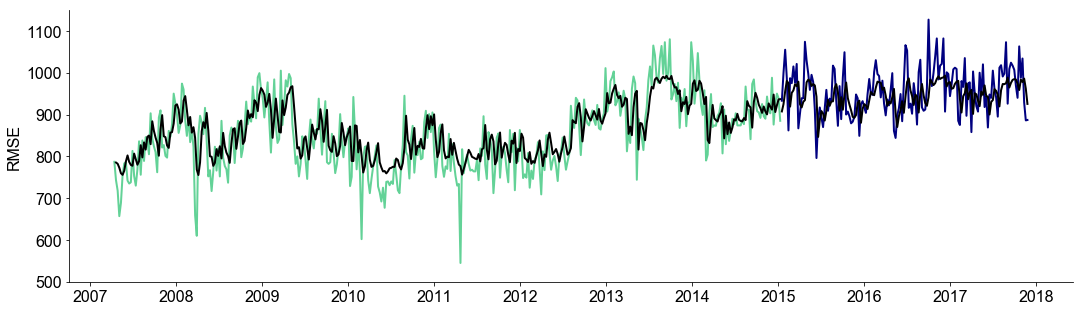

NameError: name 'loc' is not defined

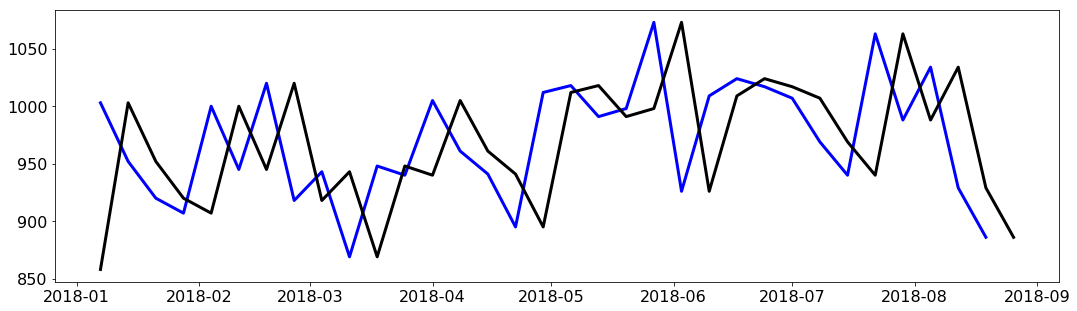

In [74]:
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
monthsFmt = DateFormatter("%Y")

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-150:],series.values[-150:], '-', color = 'navy', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:],pred_test_avg, '-', color= 'lightgrey', linewidth =1.0)
# ax.plot_date(dfw.index[:-150],pred_train_avg, '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[:-150],series.values[:-150], '-', color = '#63d297', linewidth = 2.0)
# ax.plot_date(dfw.index[-150:], predictions_naive, '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[1:-150], predictions_naive_train[1:], '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[-150:], predictions_test_XXX, '-', color = 'lightgrey', linewidth = 1.0)
# ax.plot_date(dfw.index[1:-150], predictions_train_XXX[1:], '-', color = 'lightgrey', linewidth = 1.0)
ax.plot_date(dfw.index[-150:], predictions_test_lstm, '-', color = 'black', linewidth = 2.0)
ax.plot_date(dfw.index[1:-150], predictions_train_lstm[1:], '-', color = 'black', linewidth = 2.0)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks( **{'fontname':'Arial'})
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.ylim(500, 1150)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.savefig('avg1g.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()

#2018 Only
months    = MonthLocator(range(1,13), bymonthday=1, interval=12)
formatter = DateFormatter('%m-%y')

fig, ax = plt.subplots(figsize=(18,5))
ax.plot_date(dfw.index[-34:-1],series.values[-34:-1], '-', color = 'blue', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:],pred_test_avg[-34:], '-', color= 'grey', linewidth =1.0)
#ax.plot_date(dfw.index[:-150],pred_train_avg[-34:], '-', color = 'lightgrey', linewidth = 1.0)
#ax.plot_date(dfw.index[:-34],series.values[:-34], '-', color = '#63d297', linewidth = 2.0)
ax.plot_date(dfw.index[-34:], predictions_naive[-34:], '-', color = 'black', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:], predictions_naive_train[-34:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[-34:], predictions_test_XXX[-34:], '-', color = 'grey', linewidth = 1.0)
#ax.plot_date(dfw.index[-31:], predictions_test_lstm[-31:], '-', color = 'black', linewidth = 3.0)
#ax.plot_date(dfw.index[-34:], predictions_train_lstm[-34:], '-', color = 'black', linewidth = 3.0)
# Only show ticks on the left and bottom spines


ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
plt.xticks( **{'fontname':'Arial'})

plt.ylim(500, 1150)
plt.yticks( **{'fontname':'Arial'})
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('avg1h.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)
plt.show()


## Barplot

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

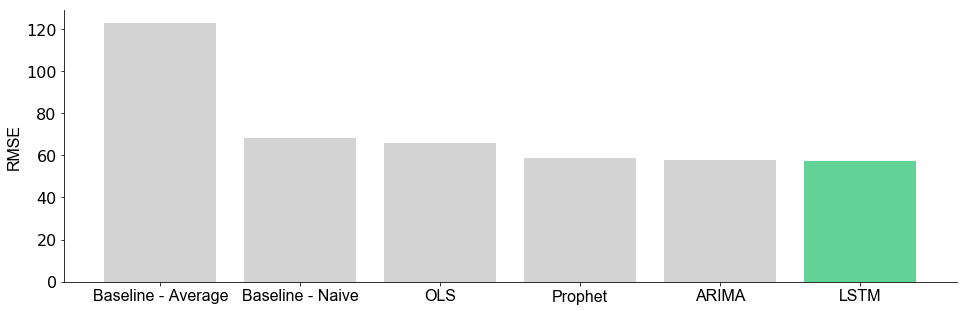

In [62]:
plt.clf()
df = pd.DataFrame(read_csv('rmse_histogram_video.csv'))
df=df.iloc[:,0:2]
df.dropna(inplace=True, axis=0)
df.columns = ['Method','RMSE']
df.index = df['Method']
df_sorted = df.sort_values('RMSE',ascending=False)
df_sorted = df_sorted[0:6]
#df.iloc[:,0]

plt.figure(figsize=[16,5])

colors = ['lightgray','lightgray','lightgray','lightgray','lightgray','#63d297']
y_pos = np.arange(len(df['Method'])-1)
plt.ylabel('RMSE', {'family': 'Arial', 'fontsize': 16 })
plt.xticks(y_pos,df_sorted['Method'], rotation = 0, **{'fontname':'Arial'})
plt.bar(y_pos,df_sorted['RMSE'], color = colors, )
#plt.title('RMSE by TimeSeries Method')

ax = plt.subplot(111)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('barplot.jpg', bbox_inches = 'tight',format = 'jpeg', dpi=600)

plt.show()

In [60]:
df

,Crime Subcategory,date
1028,CAR PROWL,2008-01-01
1029,NARCOTIC,2008-01-01
1030,CAR PROWL,2008-01-01
1031,ROBBERY-STREET,2008-01-01
1032,DUI,2008-01-01
1033,BURGLARY-RESIDENTIAL,2008-01-01
1034,BURGLARY-COMMERCIAL,2008-01-01
1035,CAR PROWL,2008-01-01
1036,MOTOR VEHICLE THEFT,2008-01-01
1037,MOTOR VEHICLE THEFT,2008-01-01


In [381]:
dfw

,number_crimes
date,
2008-01-13,787
2008-01-20,743
2008-01-27,718
2008-02-03,657
2008-02-10,689
2008-02-17,755
2008-02-24,783
2008-03-02,786
2008-03-09,742


In [392]:
len(predictions_test_lstm)

558